<a href="https://colab.research.google.com/github/rcoon084/Algorithms/blob/main/Taller_Punto_7c__y_7d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

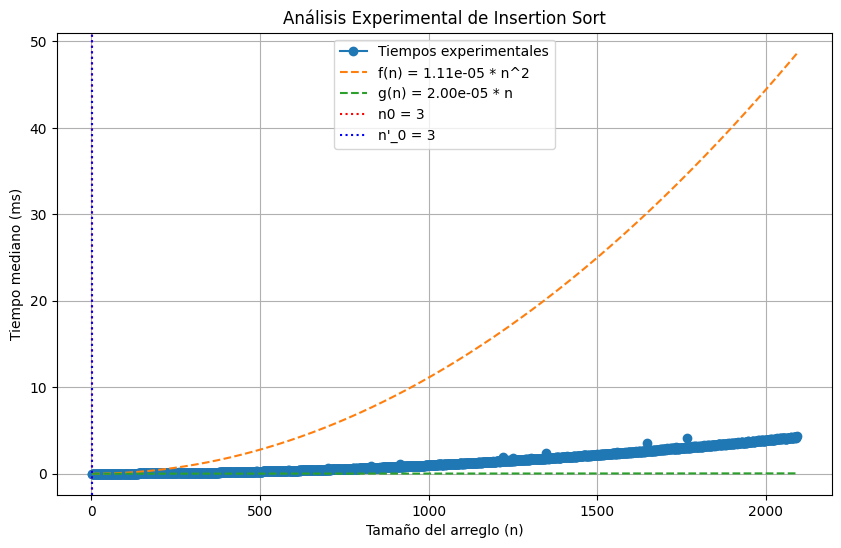

Constante c1 para O(n^2): 1.11e-05
Constante c2 para Ω(n): 2.00e-05
n0 para O(n^2): 3
n'_0 para Ω(n): 3


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leer el archivo CSV
data = pd.read_csv("insertion_sort_results.csv")

# Extraer las columnas de n y median_time
n = data["n"].values
median_time = data["median_time_ms"].values

# Ajustar las funciones teóricas
c1 = max(median_time / (n**2))  # Constante para O(n^2)
c2 = min(median_time / n)       # Constante para Ω(n)

# Definir funciones teóricas
def f(n):
    return c1 * (n**2)

def g(n):
    return c2 * n

# Encontrar n0 y n'_0
n0_candidates = n[f(n) >= median_time]  # Donde T(n) <= c1 * n^2
n0 = n0_candidates[0] if len(n0_candidates) > 0 else None

n_prime_candidates = n[g(n) <= median_time]  # Donde T(n) >= c2 * n
n_prime_0 = n_prime_candidates[0] if len(n_prime_candidates) > 0 else None

# Crear las gráficas
plt.figure(figsize=(10, 6))

# Graficar tiempos experimentales
plt.plot(n, median_time, label="Tiempos experimentales", marker="o", linestyle="-")

# Graficar funciones teóricas
plt.plot(n, f(n), label=f"f(n) = {c1:.2e} * n^2", linestyle="--")
plt.plot(n, g(n), label=f"g(n) = {c2:.2e} * n", linestyle="--")

# Marcar n0 y n'_0
if n0 is not None:
    plt.axvline(x=n0, color="red", linestyle=":", label=f"n0 = {n0}")
if n_prime_0 is not None:
    plt.axvline(x=n_prime_0, color="blue", linestyle=":", label=f"n'_0 = {n_prime_0}")

# Configurar la gráfica
plt.title("Análisis Experimental de Insertion Sort")
plt.xlabel("Tamaño del arreglo (n)")
plt.ylabel("Tiempo mediano (ms)")
plt.legend()
plt.grid()

# Guardar y mostrar la gráfica
plt.savefig("insertion_sort_analysis.png")
plt.show()

# Imprimir las constantes y valores de n0, n'_0
print(f"Constante c1 para O(n^2): {c1:.2e}")
print(f"Constante c2 para Ω(n): {c2:.2e}")
print(f"n0 para O(n^2): {n0}")
print(f"n'_0 para Ω(n): {n_prime_0}")
